In [4]:
import yfinance as yf
from matplotlib import pyplot as plt

from Backtesting.SingleTickerBacktesting import SimplePortfolioExperiment

In [23]:

import pickle
import pandas as pd

import numpy as np


def transform_to_DOIU(prices):
    arr = pd.DataFrame(prices)[0].pct_change().to_numpy()[1:]
    x = [1]
    for el in arr:
        x.append(x[-1] * (1 + el))
    return np.array(x)

def create_predictions(time_series, bin_path):
    '''
    :param time_series: np.ndarray
    :param bin_path: str
    :return: np.ndarray

    Models are fit with 30 items window.
    '''
    time_series = transform_to_DOIU(time_series).reshape(1, -1)
    with open(bin_path, 'rb') as fid:
        model = pickle.load(fid)
    return model.predict(time_series)

class LinRegExperiment(SimplePortfolioExperiment):
    def __init__(self, buy_th=0.1, sell_th=0.2):
        super().__init__()
        self.buy_th = buy_th
        self.sell_th = sell_th
        self.money_to_add = 0

    def make_action(self, ind):
        if ind > 60:
            pred = create_predictions(self.historical_data[ind-60:ind],
                                      "linreg.pkl")
            if pred - self.historical_data[ind] > self.buy_th:
                self.buy_partial(0.5, ind)
            elif pred - self.historical_data[ind] < self.sell_th:
                self.sell_partial_papers(0.5, ind, True)


In [24]:
exp = LinRegExperiment()
exp.start_experiment()

Start portfolio experiment.


100%|██████████| 1196/1196 [00:00<00:00, 35603.48it/s]


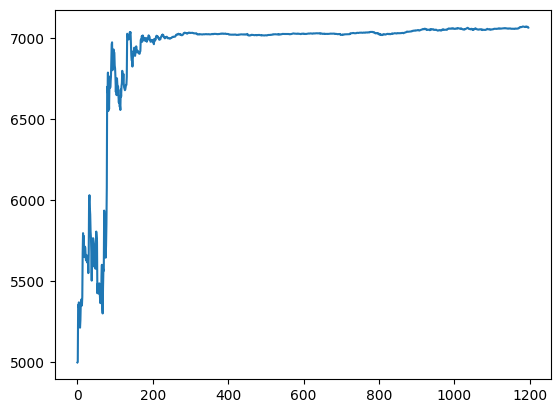

In [25]:
plt.plot(exp.history_capital)


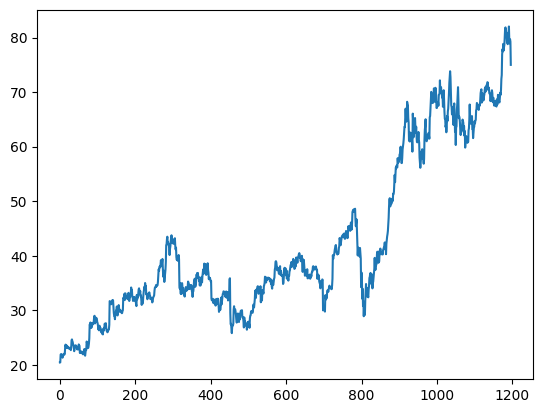

In [26]:
plt.plot(exp.historical_data)